In [5]:
#install dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras streamlit yfinance


In [6]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st


In [8]:
#fetch data
def load_data(symbol="BTC-USD", start="2020-01-01", end="2025-03-01"):
    data = yf.download(symbol, start=start, end=end)
    return data

crypto_data = load_data()
crypto_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [12]:
crypto_data.shape

(1886, 5)

In [13]:
#data preprocessing
# Select only the closing price
data = crypto_data[['Close']].values

# Scale data to range (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create time series dataset
def create_sequences(data, time_step=50):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 50  # Days to look back
X, y = create_sequences(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [14]:
X_train, X_test, y_train, y_test

(array([[[0.02203485],
         [0.01991275],
         [0.02346513],
         ...,
         [0.04664524],
         [0.05111128],
         [0.04608428]],
 
        [[0.01991275],
         [0.02346513],
         [0.02411522],
         ...,
         [0.05111128],
         [0.04608428],
         [0.04583806]],
 
        [[0.02346513],
         [0.02411522],
         [0.02412175],
         ...,
         [0.04608428],
         [0.04583806],
         [0.04660866]],
 
        ...,
 
        [[0.38736564],
         [0.38565083],
         [0.38519521],
         ...,
         [0.46323865],
         [0.45795864],
         [0.45229499]],
 
        [[0.38565083],
         [0.38519521],
         [0.41511754],
         ...,
         [0.45795864],
         [0.45229499],
         [0.46058901]],
 
        [[0.38519521],
         [0.41511754],
         [0.40690633],
         ...,
         [0.45229499],
         [0.46058901],
         [0.46219154]]]),
 array([[[0.41511754],
         [0.40690633],
         

In [15]:
#build & train LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\91892\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - loss: 0.0213 - val_loss: 0.0033
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - loss: 9.5926e-04 - val_loss: 0.0023
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 9.8568e-04 - val_loss: 0.0060
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 9.9734e-04 - val_loss: 0.0019
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - loss: 8.3068e-04 - val_loss: 0.0028
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - loss: 7.3472e-04 - val_loss: 0.0024
Epoch 12/20
46/46 ━━━━━━━━━━━━

In [16]:
#model evaluation
# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse Transform to get actual values
train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate Model
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Train RMSE: 1998.49
Test RMSE: 4609.53


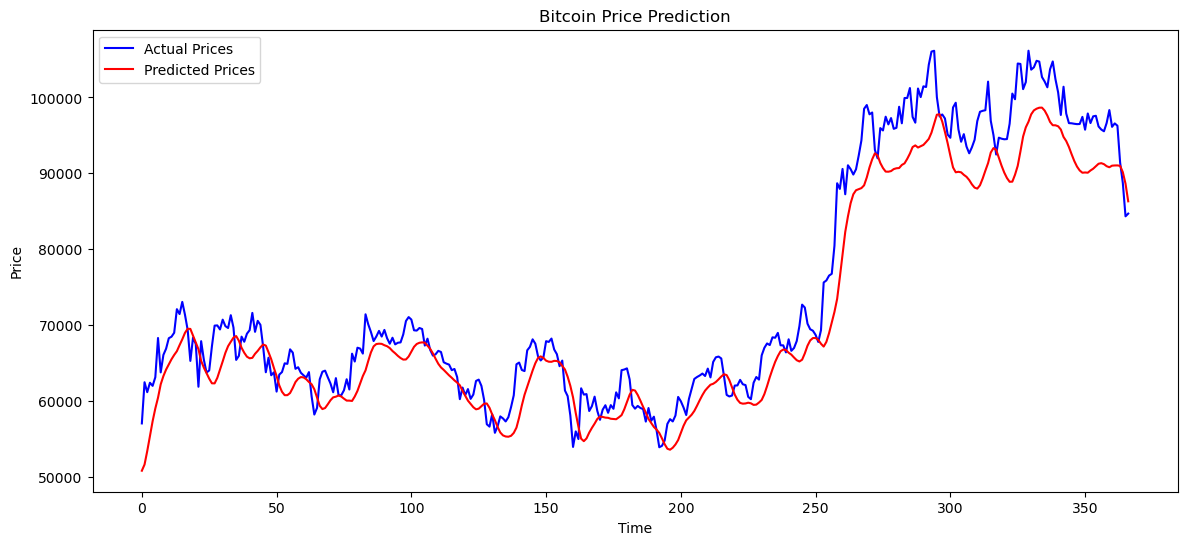

In [17]:
#visualize results
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(test_pred, label="Predicted Prices", color="red")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Bitcoin Price Prediction")
plt.show()


In [18]:
#predict future price 
def predict_next_day_price(symbol="BTC-USD", time_step=50):
    
    # Fetch latest data
    data = load_data(symbol, start="2023-01-01")
    
    # Preprocess data
    scaled_data = scaler.transform(data[['Close']].values)
    
    # Prepare input sequence
    X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
    
    # Predict next price
    prediction = model.predict(X_input)
    predicted_price = scaler.inverse_transform(prediction)[0, 0]
    
    return predicted_price

# Example Usage
next_price = predict_next_day_price("BTC-USD")
print(f"Predicted Bitcoin Price for Tomorrow: ${next_price:.2f}")


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Predicted Bitcoin Price for Tomorrow: $81868.31
